In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E_commerce.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [6]:
df.drop(['ID'] , axis = 1 , inplace = True)

In [7]:
df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [8]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# Gender Distribution

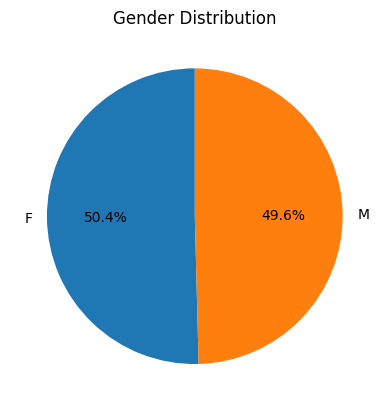

In [11]:
plt.pie(df['Gender'].value_counts(), labels = ['F','M'], autopct = '%1.1f%%' , startangle = 90)
plt.title('Gender Distribution')
plt.show()

# Product status

Text(0.5, 1.0, 'Product Costs')

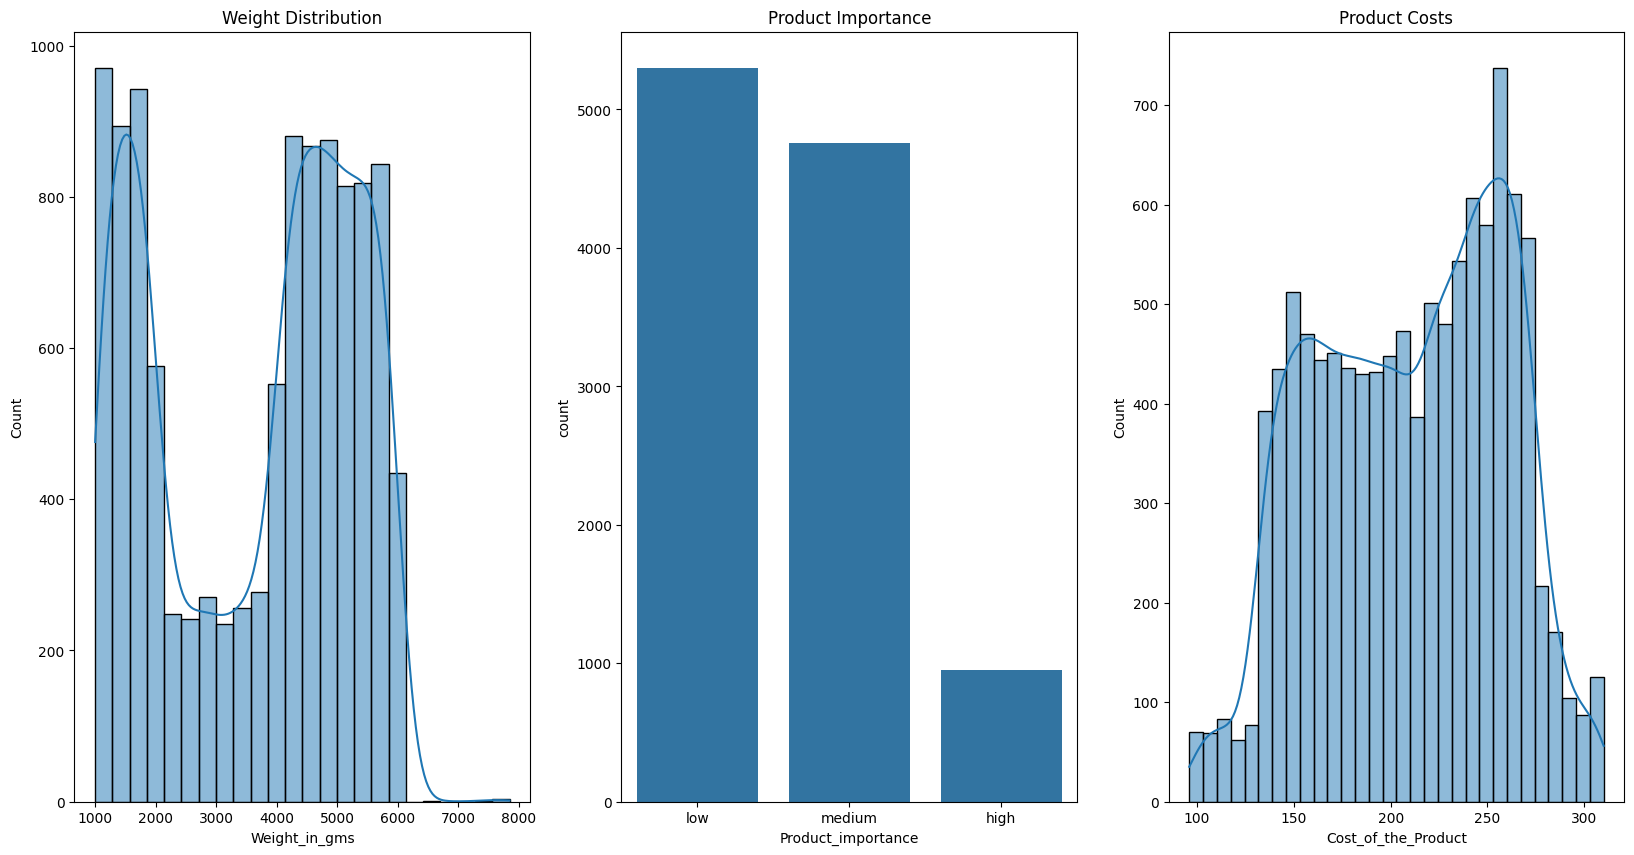

In [12]:
fig , ax = plt.subplots(1 , 3 , figsize=(20,10))
sns.histplot(df['Weight_in_gms'] , ax = ax[0] , kde = True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance' , data = df , ax = ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'] , ax = ax[2] , kde = True).set_title('Product Costs')

# Logistics Statues

Text(0.5, 1.0, 'On Time Delivery')

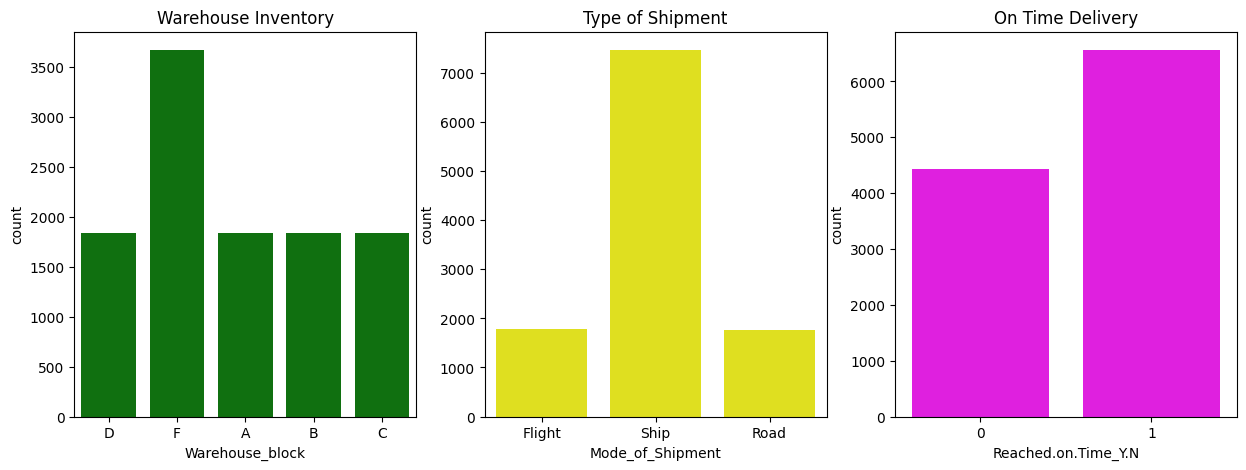

In [13]:
fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
sns.countplot(x = 'Warehouse_block' , data = df , ax = ax[0] , color = 'Green').set_title('Warehouse Inventory')
sns.countplot(x = 'Mode_of_Shipment' , data = df , ax = ax[1] , color = 'Yellow').set_title('Type of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N' , data = df , ax = ax[2] , color = 'magenta').set_title('On Time Delivery')

# Customer Experience

Text(0.5, 1.0, 'Discount')

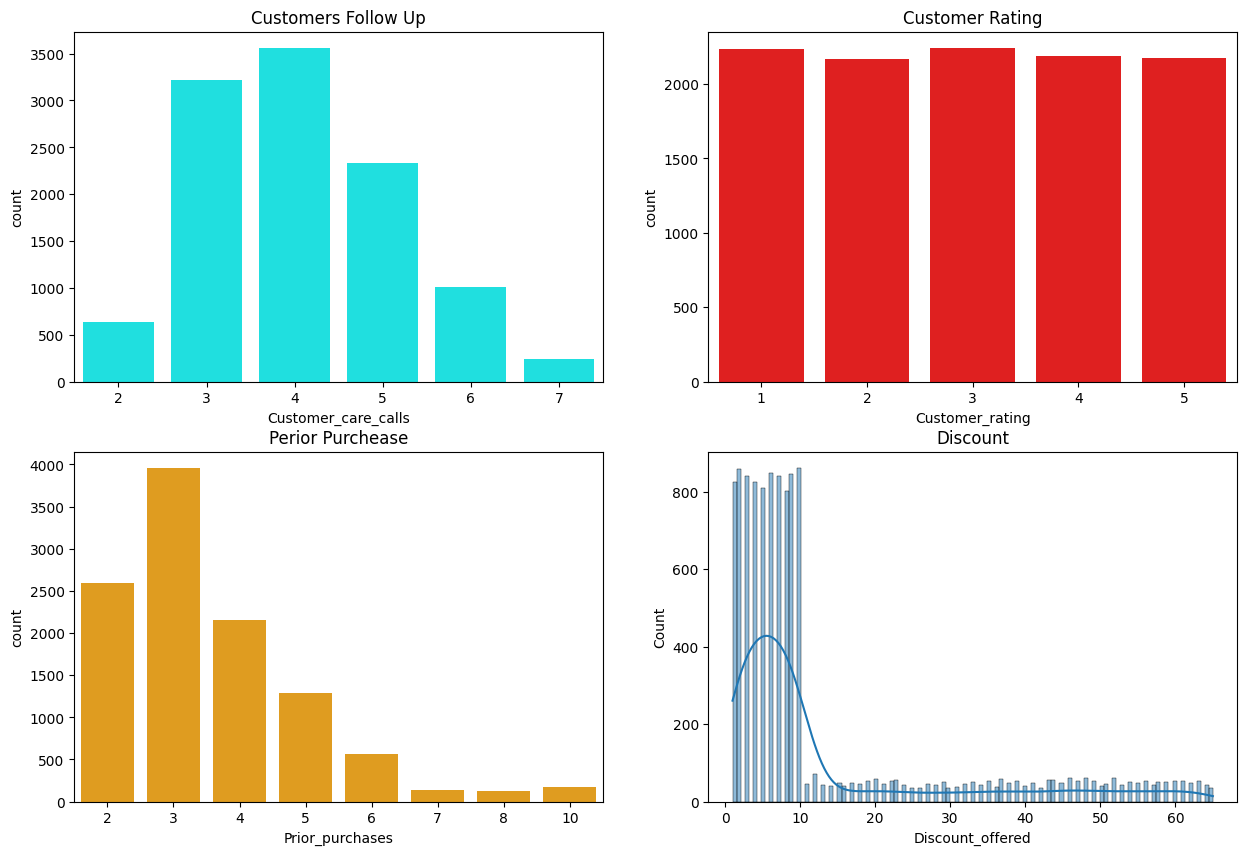

In [14]:
fig , ax = plt.subplots(2 , 2 , figsize = (15 , 10))
sns.countplot(x = 'Customer_care_calls' , data = df , ax = ax[0,0] , color = 'Cyan').set_title('Customers Follow Up')
sns.countplot(x = 'Customer_rating' , data = df , ax = ax[0,1] , color = 'Red').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases' , data = df , ax = ax[1,0] , color = 'Orange').set_title('Perior Purchease')
sns.histplot(df['Discount_offered'] , ax = ax[1,1] , kde = True).set_title('Discount')

# Customer Gender VS Delivery on Time

Text(0.5, 1.0, 'Reaching on Time per Gender')

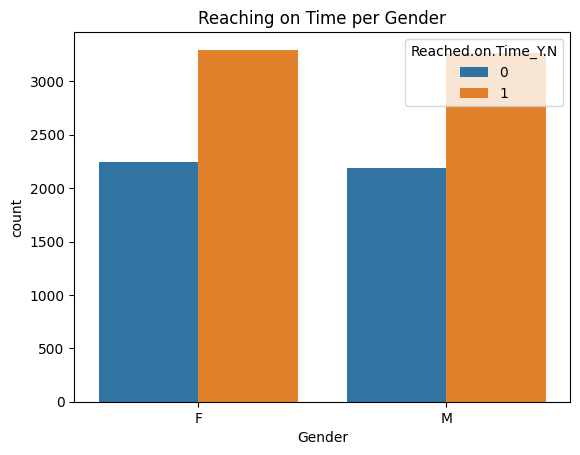

In [15]:
sns.countplot( x = 'Gender' , data = df , hue = 'Reached.on.Time_Y.N').set_title('Reaching on Time per Gender')

### *There is No relation between Gender and Product Delivery

# Product Status & Product Delivery

Text(0.5, 1.0, 'Product Cost')

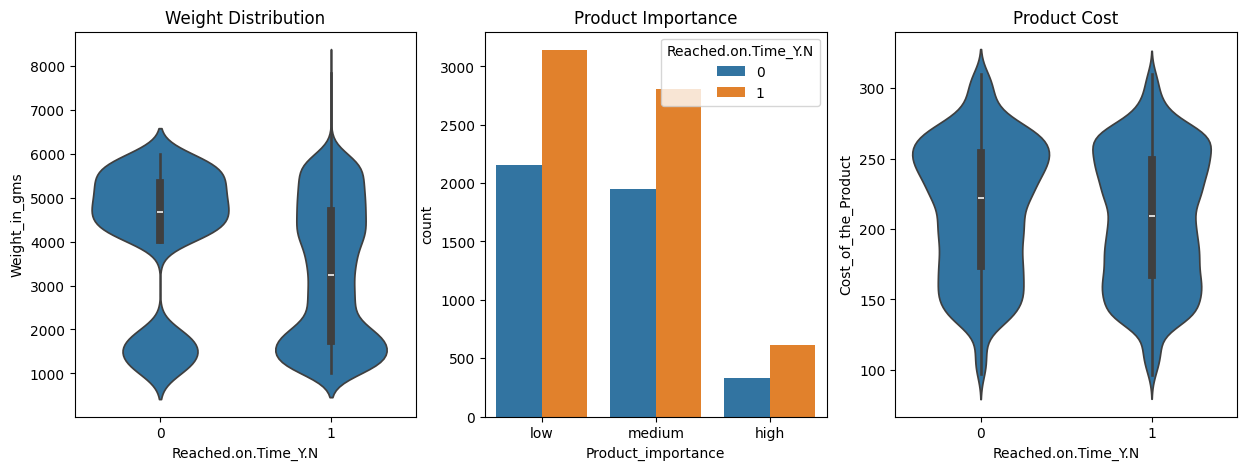

In [16]:
fig , ax = plt.subplots(1 , 3 , figsize = (15,5))
sns.violinplot(y = 'Weight_in_gms' , data = df , x = 'Reached.on.Time_Y.N' , ax = ax[0]).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance' , data = df , hue = 'Reached.on.Time_Y.N' , ax = ax[1]).set_title('Product Importance')
sns.violinplot(y = 'Cost_of_the_Product' , data = df, ax = ax[2] , x ='Reached.on.Time_Y.N').set_title('Product Cost')

### *We can not extract specific relationship between Product Importance & Product Delivery, Although, Weight of the Product & Cost of the Product has direct impact on Delivery Time.

# Logistics & Product Deliver

Text(0.5, 1.0, 'Type Of Shipment')

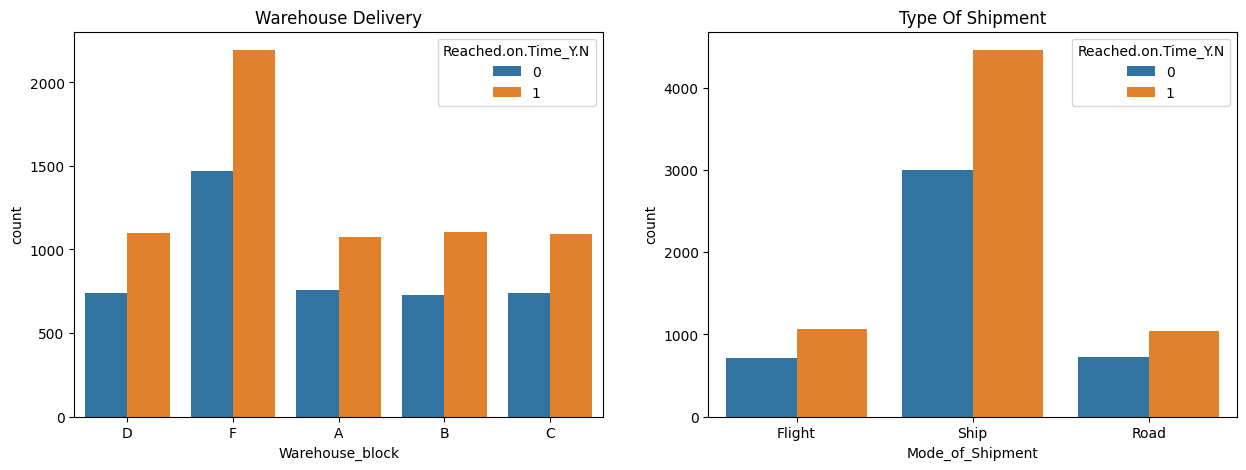

In [17]:
fig , ax = plt.subplots( 1 , 2 , figsize = (15,5))
sns.countplot(x = 'Warehouse_block' , data = df , ax = ax[0] , hue = 'Reached.on.Time_Y.N').set_title('Warehouse Delivery')
sns.countplot(x = 'Mode_of_Shipment' , data = df , ax = ax[1] , hue = 'Reached.on.Time_Y.N').set_title('Type Of Shipment')

### *Against the odds, Since the On-time delivered product and Not-on-time Delivered Product is consistent across all the warehouse blocks and Type of Shipments, So we can not assume a relationship between these two variables & Product delivery.

# Customer Experience & Product Delivery

Text(0.5, 1.0, 'Discount Offered')

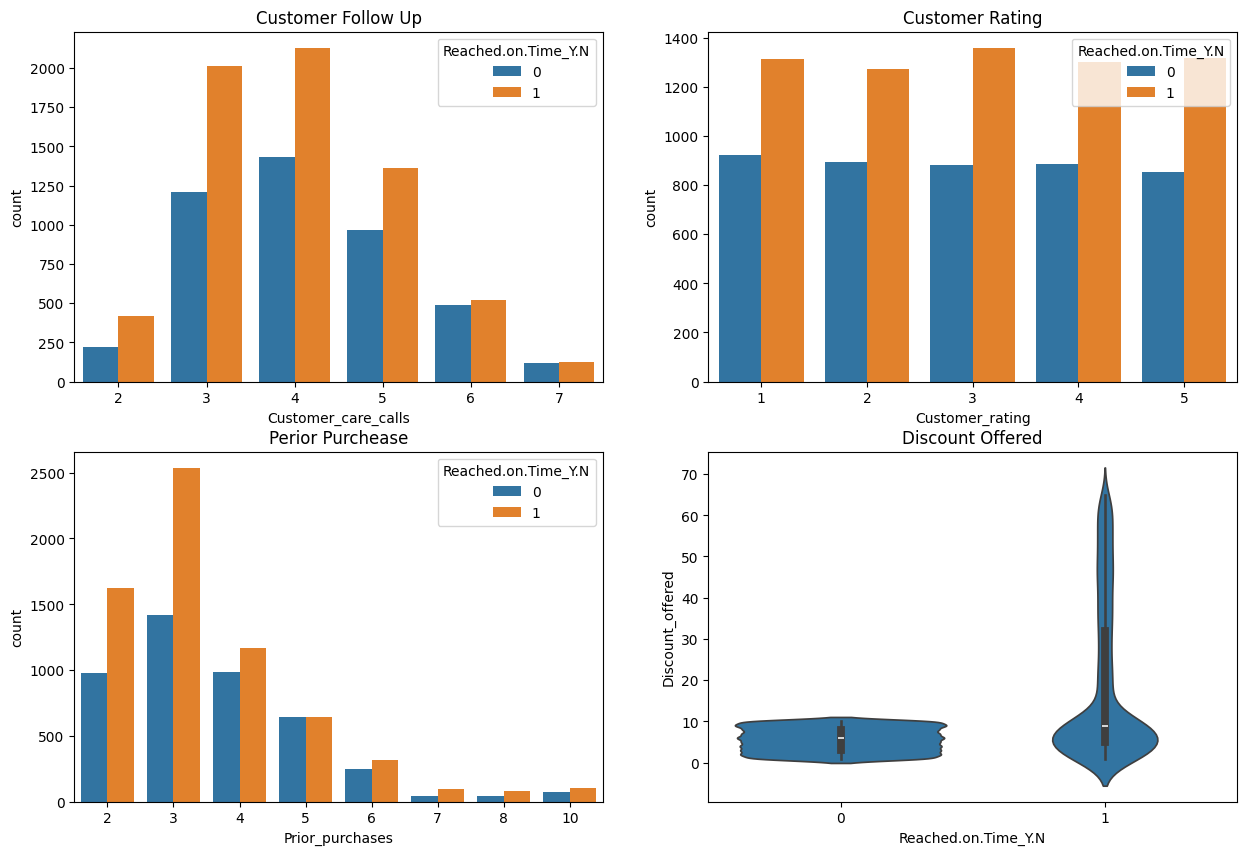

In [18]:
fig , ax = plt.subplots(2 , 2 , figsize = (15,10))
sns.countplot(x = 'Customer_care_calls' , data = df , hue = 'Reached.on.Time_Y.N' , ax = ax[0,0]).set_title('Customer Follow Up')
sns.countplot(x = 'Customer_rating' , data = df , hue = 'Reached.on.Time_Y.N' , ax = ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases' , data = df , hue = 'Reached.on.Time_Y.N' , ax = ax[1,0]).set_title('Perior Purchease')
sns.violinplot(x = 'Reached.on.Time_Y.N' , data = df , y = 'Discount_offered' , ax = ax[1,1]).set_title('Discount Offered')

### *These charts represents the relation ship between these variables. In the first one we can figure out that as delivery time dicreases, more customer tend to call customer care unit. In the next chart, Customer Rating is observed next to Product Delivery. As you see there is no relationship between these two because we see no difference between the time delivery for each rate. The third graph represents perior purchease againts Delivery time. We can see that each customer who has perior purchease from this company, gets him order right in time and this is why that they buy again from this company. Last graph shows us the products that have more than 10% discount, have higher count of products delivered on time.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Warehouse_block' , 'Mode_of_Shipment' , 'Gender' , 'Product_importance']
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print( i , df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Gender [0 1]
Product_importance [1 2 0]


<Axes: >

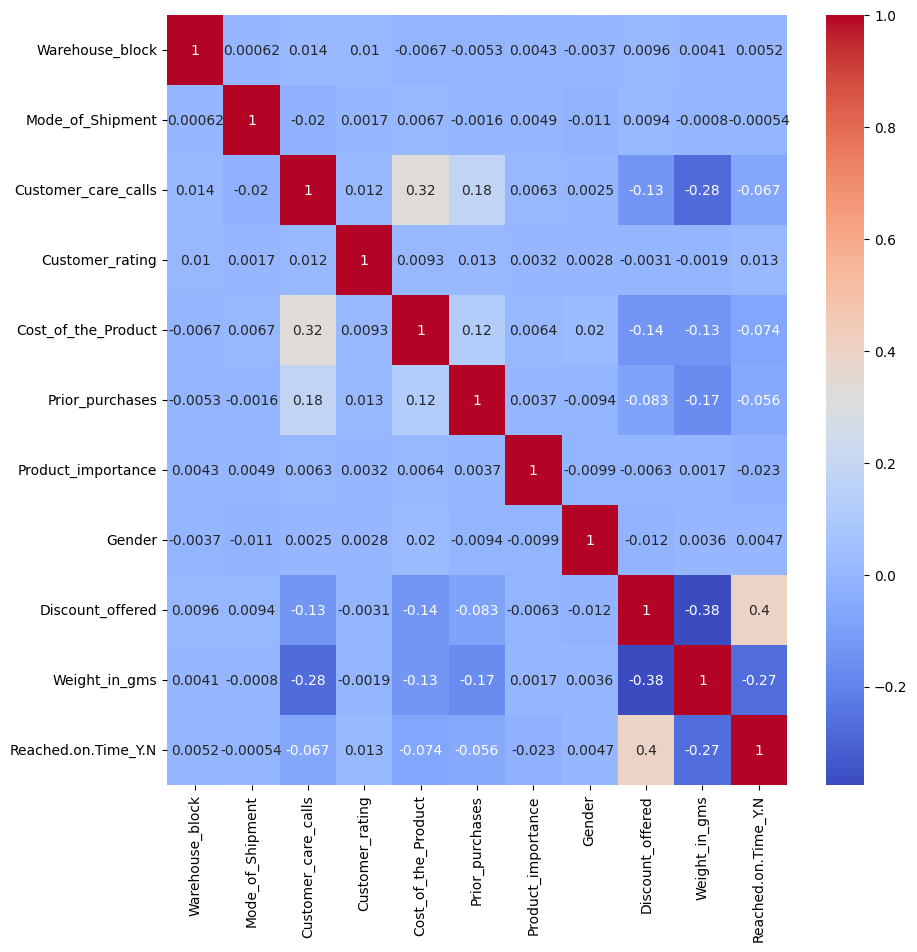

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')

### * As we can obsereve there is a positive correlation between Custome Care Call and Cost of the Product

Text(0.5, 1.0, 'Product Cost VS Customer Follow Up')

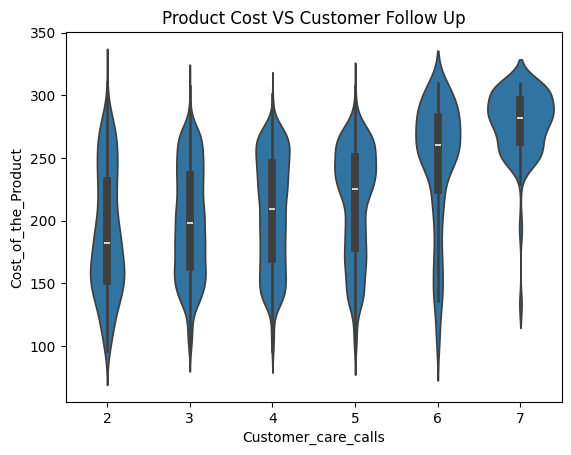

In [21]:
sns.violinplot(x= 'Customer_care_calls'  , y = 'Cost_of_the_Product' , data = df).set_title('Product Cost VS Customer Follow Up')

### *It is clear that the cost of Product and customer anxiety have positive relationship, because the higher cost of the product is, the more customer calles the care unit.

In [22]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop(['Reached.on.Time_Y.N'] , axis = 1) , df['Reached.on.Time_Y.N'] , test_size = 0.2 , random_state = 0)

## We will set up the model in Four ways

### 1. Decision Tree Classification

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(train_x , train_y)

DecisionTreeClassifier()

In [31]:
dtree_pred = dtree.predict(test_x)

In [32]:
print('Decision Tree Classifier Score is:' , dtree.score(test_x , test_y))

Decision Tree Classifier Score is: 0.6354545454545455


### 2. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
log = LogisticRegression()
log.fit(train_x , train_y)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
log_pred = log.predict(test_x)

In [37]:
print('Logistic Regression Score is:' , log.score(test_x , test_y))

Logistic Regression Score is: 0.6331818181818182


### 3. K Nearest Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()
knn.fit(test_x , test_y)

KNeighborsClassifier()

In [40]:
knn_pred = knn.predict(test_x)

In [41]:
print('K Neighbor Score is:' , knn.score(test_x , test_y))

K Neighbor Score is: 0.7781818181818182


### 4. Random Forest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier()
rfc.fit(train_x , train_y)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(test_x)

In [46]:
print('Random Forest Classification Score is:' , rfc.score(test_x , test_y))

Random Forest Classification Score is: 0.6513636363636364


# Comparison between the models

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'Random Forest Classification')

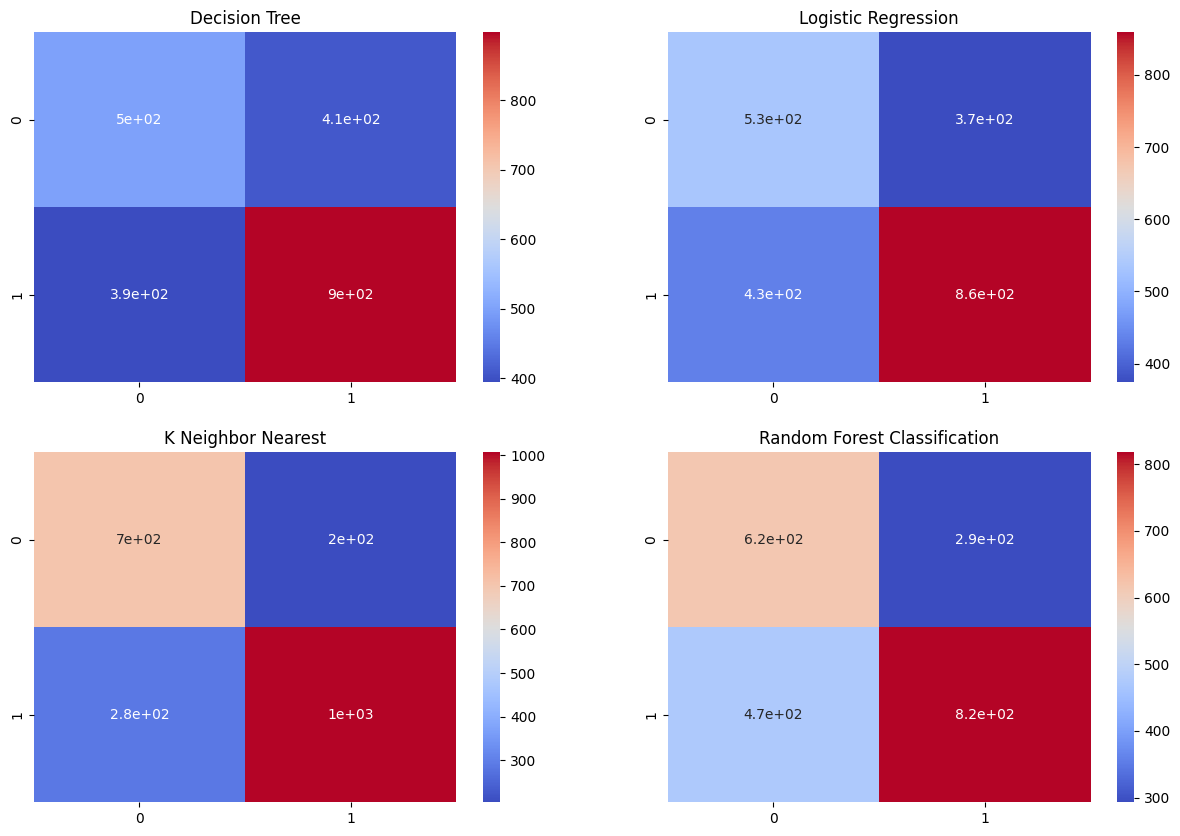

In [53]:
fig , ax = plt.subplots(2 , 2 , figsize = (15,10))
sns.heatmap(confusion_matrix(test_y , dtree_pred) , annot = True , cmap = 'coolwarm' , ax = ax[0,0]).set_title('Decision Tree')
sns.heatmap(confusion_matrix(test_y , log_pred) , annot = True , cmap = 'coolwarm' , ax = ax[0,1]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(test_y , knn_pred) , annot = True , cmap = 'coolwarm' , ax = ax[1,0]).set_title('K Neighbor Nearest')
sns.heatmap(confusion_matrix(test_y , rfc_pred) , annot = True , cmap = 'coolwarm' , ax = ax[1,1]).set_title('Random Forest Classification')

In [54]:
print('Dision Tree Classification: \n' , classification_report(test_y , dtree_pred))
print('Logistic Regression: \n' , classification_report(test_y , log_pred))
print('K Neighbor Nearest: \n' , classification_report(test_y , knn_pred))
print('Random Forest Classification: \n' , classification_report(test_y , rfc_pred))

Dision Tree Classification: 
               precision    recall  f1-score   support

           0       0.56      0.55      0.55       908
           1       0.69      0.70      0.69      1292

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.64      0.64      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.59      0.57       908
           1       0.70      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.63      0.62      2200
weighted avg       0.64      0.63      0.63      2200

K Neighbor Nearest: 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       908
           1       0.83      0.78      0.80      1292

    accuracy                           0.78      2200
   macro avg       0.77      0.78      0.77      2200

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9632\956307529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = models , y=accuracy , palette = 'magma').set_title('Model Comparison')


Text(0, 0.5, 'Accuracy')

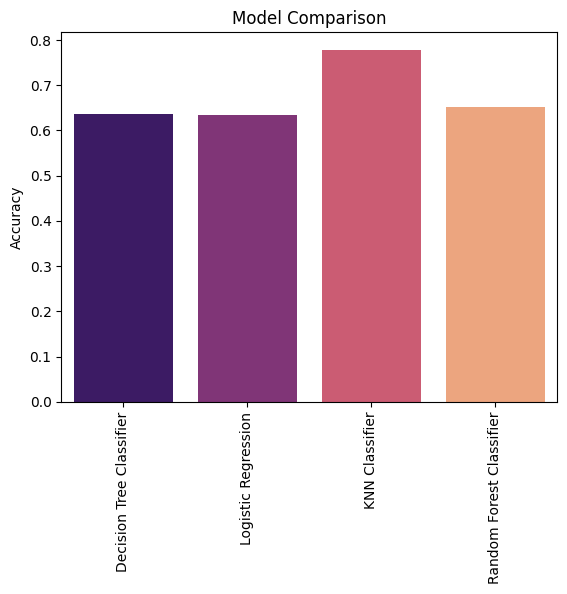

In [63]:
models = ['Decision Tree Classifier' , 'Logistic Regression' , 'KNN Classifier' , 'Random Forest Classifier']
accuracy = [accuracy_score(test_y , dtree_pred) , accuracy_score(test_y , log_pred) , accuracy_score(test_y , knn_pred) , accuracy_score(test_y , rfc_pred)]
sns.barplot(x = models , y=accuracy , palette = 'magma').set_title('Model Comparison')
plt.xticks(rotation = 90)
plt.ylabel('Accuracy')


# Conclusion

## The aim of this project was to develope a model to predict whether the product will reache on time or not. Firstly, we grouped similar factors and analyzed them seperately to figure out which factors would impact on delivery time. The groups were: Product Status, Logistics and Customer Experience.

## Our prediction goal was delivery time, so we compared each of these groups with product delivery by violin and count plots. The results of these analyses was the most impactfull factors on delivery time.
## Now it's the time to develope our machine learning models. To get the best results, I assume four ML models to predict and as you can see in the final plot, according to the accuracies, the best model to predict in this case is K-Neighbor Nearest Classification.